In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(threshold=np.nan)
from Strawry.env import Env 
env = Env()

In [21]:
env.set_target(temp=10,humi=80,co2=350,light=0,watp=0)



440

Score over time: 75.99


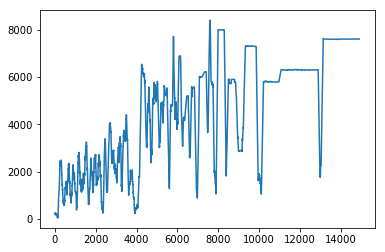

In [22]:
Q= np.zeros((env.n_state, env.n_action))
y = 0.99
lr = 0.25

num_episodes = 15000


rList = []
alpha=np.log(0.1)/num_episodes      # decay learning rate
for i in range(num_episodes):
    lr= np.exp(alpha*i)  #decay learning rate
    s = env.reset()
    rAll = 0
    done=False
  
    while done==False:               #random action to get next state and action
        if np.random.rand() < lr*0.01:
            a = np.random.randint(env.n_action)
        else:
            a = np.argmax(Q[s,:] )
        s1,reward,done,_ = env.step(a)
        
        if done:
            r = 1 if reward > 0.0 else -0.1
        else:
            r =-0.00001
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] +  lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
#         Q[s,a] = Q[s,a] +  lr*(r + y*np.min(Q[s1,:]) - Q[s,a])
        rAll += reward
        s = s1
        if done == True:
            break
    rList.append(rAll)
print ("Score over time: " +  str(sum(rList[-100:])/100.0))
plt.plot(np.convolve(np.ones(100),rList,"valid"))



In [23]:
print(Q)

[[ -4.04261315e-04   5.11844102e-02   1.23437272e-01  -9.70129071e-02
   -4.00835038e-04  -4.12326648e-04  -3.38952818e-03   2.27711831e-01
   -9.70292482e-02  -9.68183899e-02  -4.04257754e-04  -4.04257754e-04
   -9.70049229e-02  -9.73170139e-02  -4.04266654e-04  -4.98033966e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+0

In [78]:
print(s)

80


In [79]:
print(rAll)

75
